<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


Task 2

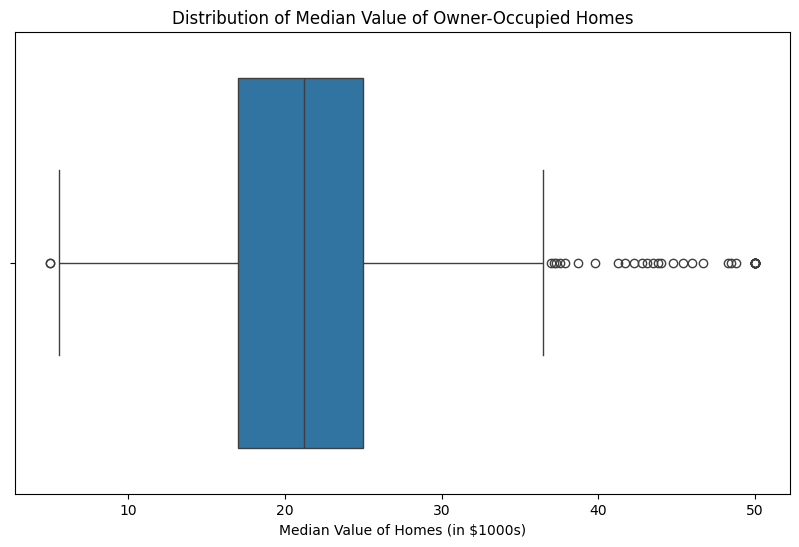

In [11]:
# Boxplot for the median value of owner-occupied homes
pyplot.figure(figsize=(10, 6))
sns.boxplot(x=boston_df['MEDV'])
pyplot.title('Distribution of Median Value of Owner-Occupied Homes')
pyplot.xlabel('Median Value of Homes (in $1000s)')
pyplot.show()

The boxplot shows a relatively narrow interquartile range around the median value, suggesting that the majority of owner-occupied homes are clustered within a similar price range. However, there are numerous outliers on the higher end, indicating that a few homes are valued significantly higher than the typical range. This could point to specific areas or characteristics driving up home values in certain parts of Boston.

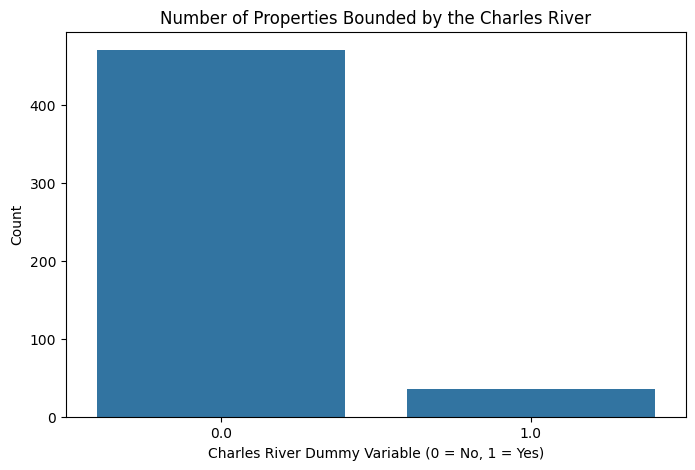

In [12]:
# Bar plot for the Charles River variable
pyplot.figure(figsize=(8, 5))
sns.countplot(x=boston_df['CHAS'])
pyplot.title('Number of Properties Bounded by the Charles River')
pyplot.xlabel('Charles River Dummy Variable (0 = No, 1 = Yes)')
pyplot.ylabel('Count')
pyplot.show()

The bar plot indicates that the majority of properties are not bounded by the Charles River, with only a small fraction located near it. This could have implications on housing prices and environmental factors, suggesting that river-bounded properties might be rarer and potentially more desirable.

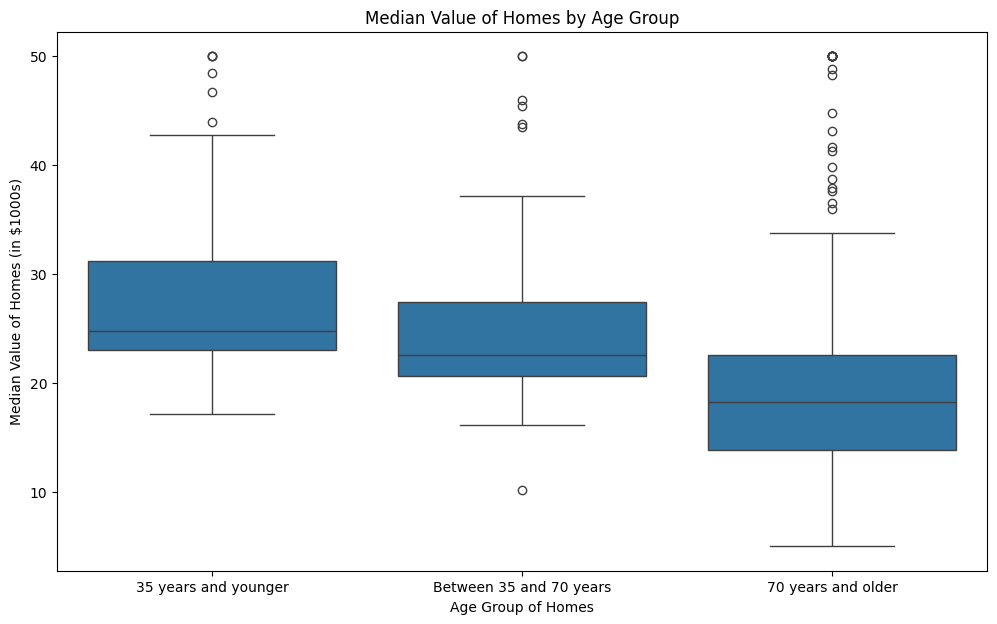

In [15]:
# Discretize the AGE variable into three groups
boston_df['AGE_GROUP'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, 100], labels=['35 years and younger', 'Between 35 and 70 years', '70 years and older'])

# Boxplot for MEDV vs. AGE groups
pyplot.figure(figsize=(12, 7))
sns.boxplot(x='AGE_GROUP', y='MEDV', data=boston_df)
pyplot.title('Median Value of Homes by Age Group')
pyplot.xlabel('Age Group of Homes')
pyplot.ylabel('Median Value of Homes (in $1000s)')
pyplot.show()

The boxplot segmented by age group shows that homes aged 35 years and younger tend to have a slightly higher median value and less variation compared to older homes. In contrast, homes between 35 and 70 years show wider spread in values, indicating a more diverse range in the condition or desirability of these properties. The oldest homes, 70 years and older, tend to have lower median values, which could reflect issues such as aging infrastructure or less modern amenities.

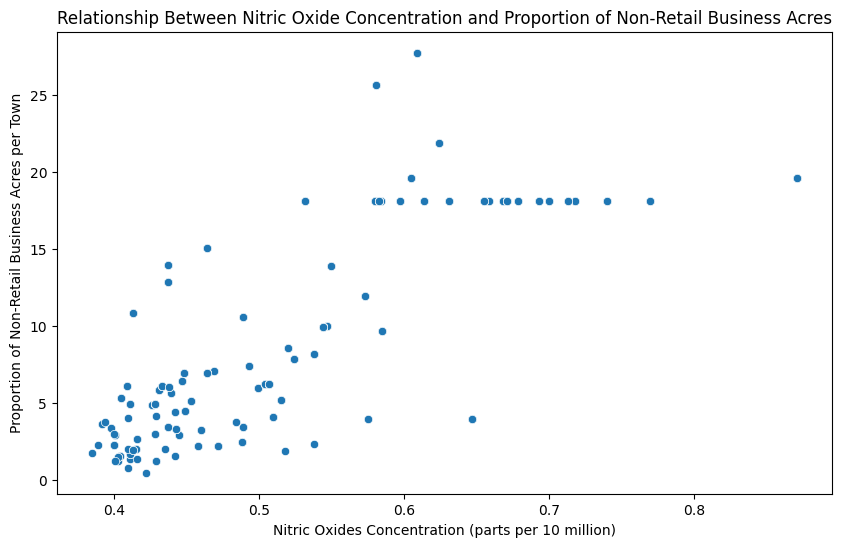

In [16]:
# Scatter plot for NOX vs. INDUS
pyplot.figure(figsize=(10, 6))
sns.scatterplot(x=boston_df['NOX'], y=boston_df['INDUS'])
pyplot.title('Relationship Between Nitric Oxide Concentration and Proportion of Non-Retail Business Acres')
pyplot.xlabel('Nitric Oxides Concentration (parts per 10 million)')
pyplot.ylabel('Proportion of Non-Retail Business Acres per Town')
pyplot.show()

The scatter plot shows a positive trend, suggesting that as the concentration of nitric oxides increases, there is generally an increase in the proportion of non-retail business acres. This might imply that industrial areas, which are more likely to produce nitric oxides, also occupy more non-retail business land in towns.

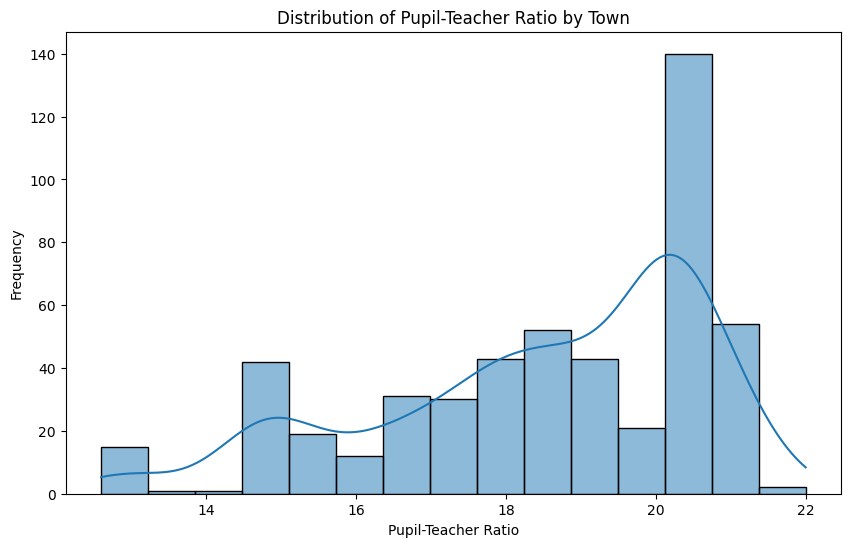

In [17]:
# Histogram for the pupil-teacher ratio
pyplot.figure(figsize=(10, 6))
sns.histplot(boston_df['PTRATIO'], bins=15, kde=True)
pyplot.title('Distribution of Pupil-Teacher Ratio by Town')
pyplot.xlabel('Pupil-Teacher Ratio')
pyplot.ylabel('Frequency')
pyplot.show()

The histogram for the pupil-teacher ratio by town displays a skewed distribution with a peak around a ratio of 20. This indicates that most towns have a pupil-teacher ratio near this value, with fewer towns having significantly lower or higher ratios. A high concentration around a specific ratio suggests uniformity in educational resources allocation across the region, although variations do exist.

Task 3

Q1
H0:The median values of houses bounded by the Charles River are equal to those not bounded by the Charles River.
H1:The median values of houses bounded by the Charles River are not equal to those not bounded by the Charles River.


In [19]:
from scipy.stats import ttest_ind

#CHAS = the Charles River dummy variable, MEDV = median value of houses bounded
group1 = boston_df[boston_df['CHAS'] == 1]['MEDV']
group2 = boston_df[boston_df['CHAS'] == 0]['MEDV']

t_stat, p_value = ttest_ind(group1, group2, equal_var=False)

print("T-Statistic:", t_stat)
print("P-value:", p_value)

T-Statistic: 3.113291312794837
P-value: 0.003567170098137517


Conclusion:
Since the p-value is far smaller than 0.05, we can reject H0 and accept H1, which indicates that there are statistically significant differences in Median House Values by Charles River Proximity.

Q2
H0: There are no differences in the median values of houses among the different age groups.
H1: There are differences in the median values of houses among the different age groups.

In [20]:
from scipy.stats import f_oneway

anova_results = f_oneway(boston_df[boston_df['AGE_GROUP'] == '35 years and younger']['MEDV'],
                         boston_df[boston_df['AGE_GROUP'] == 'Between 35 and 70 years']['MEDV'],
                         boston_df[boston_df['AGE_GROUP'] == '70 years and older']['MEDV'])

print("F-Statistic:", anova_results.statistic)
print("P-value:", anova_results.pvalue)

F-Statistic: 36.40764999196599
P-value: 1.7105011022702984e-15


Conclusion:
Since the p-value is much smaller than 0.05, we can reject H0 and accept H1. This indicates that there are stastiscally significant differences in the median values of houses among the different age groups.

Q3
H0:There is no correlation between nitric oxide concentrations and the proportion of non-retail business acres per town.
H1:There is a correlation between nitric oxide concentrations and the proportion of non-retail business acres per town.

In [21]:
from scipy.stats import pearsonr

correlation_coef, p_value = pearsonr(boston_df['NOX'], boston_df['INDUS'])

print("Correlation Coefficient:", correlation_coef)
print("P-value:", p_value)


Correlation Coefficient: 0.7636514469209192
P-value: 7.913361061210442e-98


Conclusion:
The p-value of 7.913361061210442e-98 is below 0.05, we can reject H0.This result indicates a strong positive correlation between nitric oxide concentrations and the proportion of non-retail business acres per town. 

In [ ]:
Q4
H0:The weighted distance to the five Boston employment centres has no effect on the median value of owner-occupied homes.
H1:The weighted distance to the five Boston employment centres has an effect on the median value of owner-occupied homes.

In [22]:
import statsmodels.api as sm

X = sm.add_constant(boston_df['DIS'])
y = boston_df['MEDV']

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 06 May 2024   Prob (F-statistic):           1.21e-08
Time:                        00:20:13   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

Conclusion:
The regression analysis shows a significant positive relationship between the weighted distance to the five Boston employment centers and the median value of owner-occupied homes. With an F-statistic of 33.58 and a p-value of 1.21e-08, which is below 0.05, we reject H0. The positive coefficient of 1.0916 for distance indicates that each additional unit of distance is associated with an increase of approximately $1,091 in the median value of homes. This suggests that properties located further from these employment centers are valued higher, possibly due to factors like better neighborhood quality or lower density. 